In [110]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
from matplotlib import cm
import seaborn as sns
%matplotlib inline

eventos = pd.read_csv('events.csv',low_memory=False)

In [111]:
eventos = eventos.loc[eventos["event"] == "ad campaign hit"]
eventos = eventos[["event", "campaign_source"]]
eventos.head(10)

,event,campaign_source
0,ad campaign hit,criteo
6,ad campaign hit,criteo
11,ad campaign hit,google
15,ad campaign hit,google
99,ad campaign hit,google
101,ad campaign hit,google
107,ad campaign hit,google
111,ad campaign hit,criteo
119,ad campaign hit,FacebookAds
132,ad campaign hit,zanox


In [112]:
ingresosTotal = eventos["campaign_source"].value_counts(normalize=True).sum()
ingresosTotal

1.0

In [113]:
ingresosFuentes = eventos["campaign_source"].value_counts(normalize = True).reset_index()['index'].tolist()
ingresosFuentes

['google',
 'criteo',
 'rtbhouse',
 'zanox',
 'emblue',
 'FacebookAds',
 'afilio',
 'bing',
 'voxus',
 'rakuten',
 'indexa',
 'buscape',
 'manifest',
 'Facebook',
 'datacrush',
 'blog',
 'afiliado',
 'yotpo',
 'mercadopago',
 'FacebookSocial',
 'MARKETING SOCIAL',
 'onsite',
 'Google Social',
 'socialmedia']

In [114]:
ingresosCantidad = eventos["campaign_source"].value_counts(normalize = True).reset_index()["campaign_source"].tolist()
for i in range(len(ingresosCantidad)):
    ingresosCantidad[i] = -ingresosCantidad[i]

In [115]:
ingresosFuentes.insert(0,'todos los eventos')
ingresosFuentes

['todos los eventos',
 'google',
 'criteo',
 'rtbhouse',
 'zanox',
 'emblue',
 'FacebookAds',
 'afilio',
 'bing',
 'voxus',
 'rakuten',
 'indexa',
 'buscape',
 'manifest',
 'Facebook',
 'datacrush',
 'blog',
 'afiliado',
 'yotpo',
 'mercadopago',
 'FacebookSocial',
 'MARKETING SOCIAL',
 'onsite',
 'Google Social',
 'socialmedia']

In [116]:
ingresosCantidad.insert(0,ingresosTotal)
len(ingresosCantidad)

25

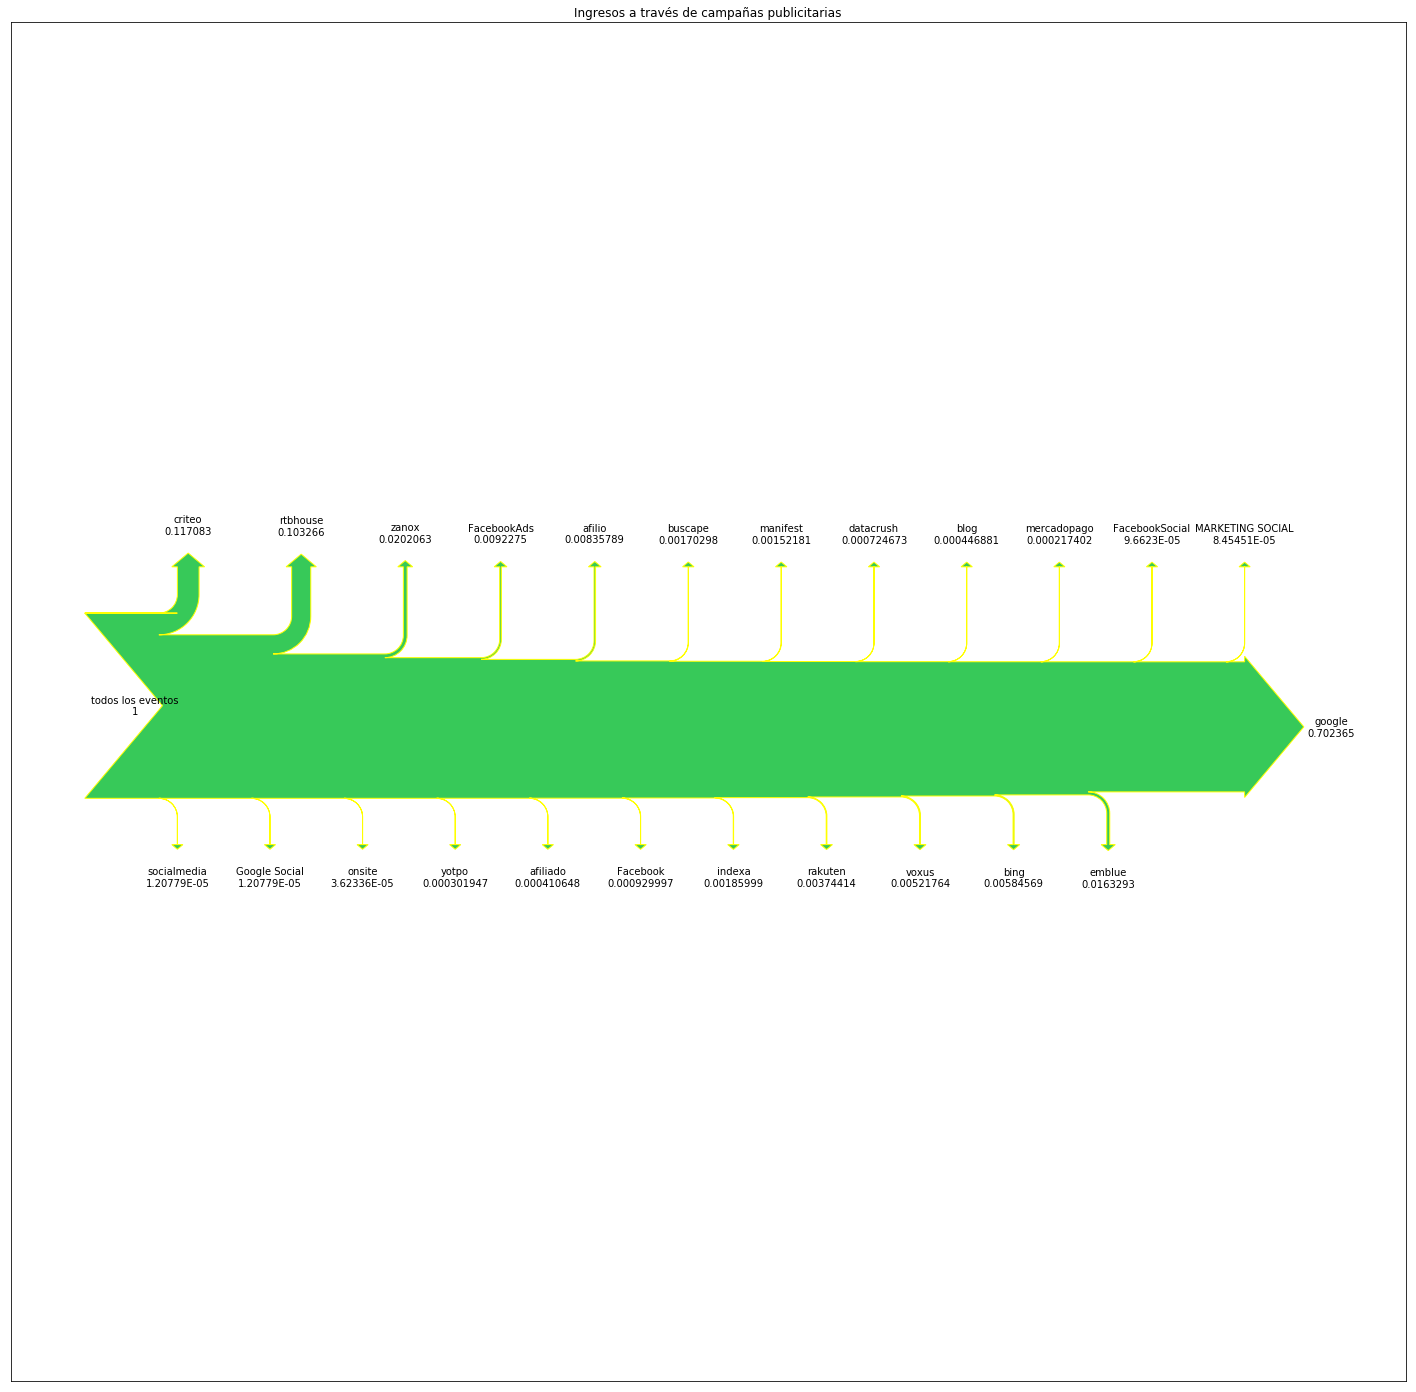

In [145]:
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Ingresos a través de campañas publicitarias")
diagrams = Sankey(ax=ax,facecolor='#37c959', flows=ingresosCantidad,labels=ingresosFuentes, scale = 1.0, color = 'yellow', gap=0.5, orientations=[0, 0, 1, 1, 1, -1, 1, 1,-1,-1,-1,-1,1,1,-1,1,1,-1,-1,1,1,1,-1,-1,-1]).finish()
for diagram in diagrams:
    for text in diagram.texts:
        text.set_fontsize('10')
plt.show()

Como era de esperar Google se lleva todos los ingresos a través de una campaña publicitaria.